In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
cv2.__version__

'4.8.0'

In [26]:
def show_img(img):
    if img.ndim == 3:  # 如果图像是彩色的
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
    plt.axis('off')  # 不显示坐标轴
    plt.show()

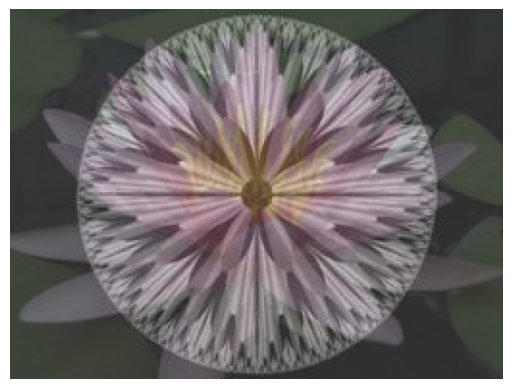

In [27]:
img1 = cv2.imread('./files/diamond2.jpg')
img2 = cv2.imread('./files/flower2.jpg')
dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
show_img(dst)
# cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

原图:


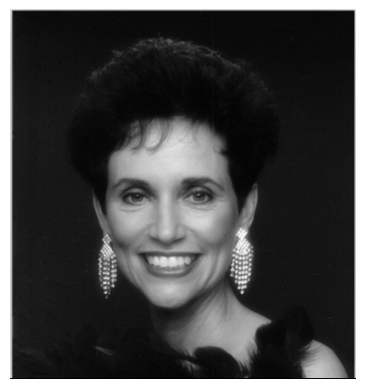

亮度加80


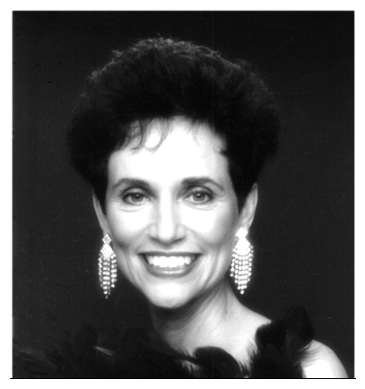

亮度减80


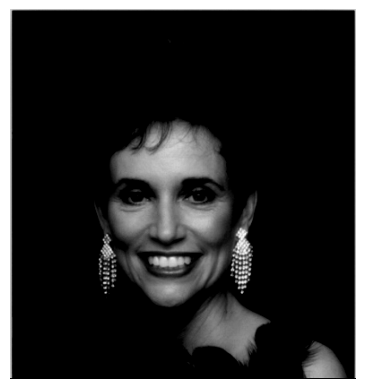

亮度乘以1.5


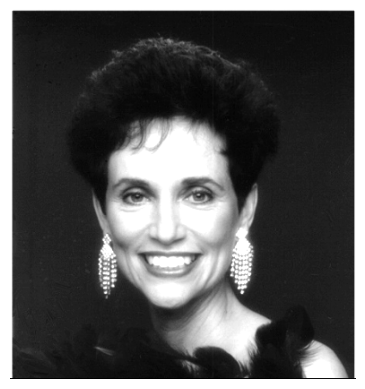

In [28]:
img = cv2.imread('./files/woman.png', 0)
img1 = cv2.add(img, 80)
img2 = cv2.subtract(img, 80)
img3 = cv2.multiply(img, 1.5)
# cv2.imshow('img',img)
print('原图:')
show_img(img)
# cv2.imshow('img1',img1)
print('亮度加80')
show_img((img1))
# cv2.imshow('img2',img2)
print('亮度减80')
show_img((img2))
# cv2.imshow('img3',img3)
print('亮度乘以1.5')
show_img((img3))
cv2.waitKey(0)
cv2.destroyAllWindows()

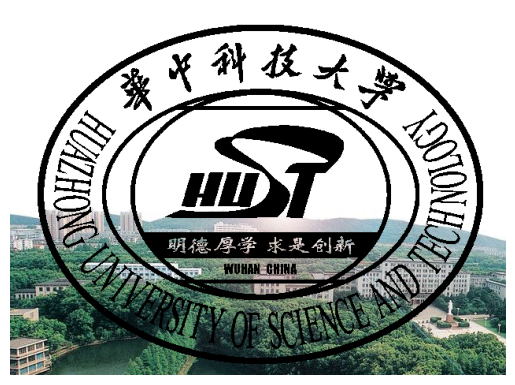

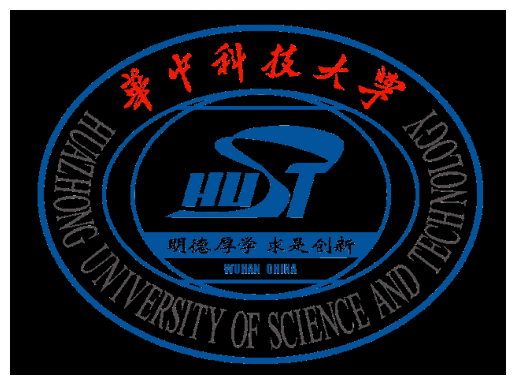

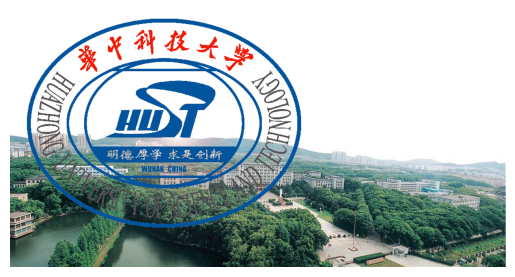

In [29]:
img1 = cv2.imread('./files/hust.jpg')
img2 = cv2.imread('./files/hustlogo.bmp')
# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask_front = cv2.threshold(img2gray, 175, 255, cv2.THRESH_BINARY)
#这是图像分割方法，后面讲到。
mask_inv = cv2.bitwise_not(mask_front)
# Now black-out the area of logo in ROI
# 取roi 中与mask 中不为零的值对应的像素的值，其他值为0
# 注意这里必须有mask=mask 或者mask=mask_inv, 其中的“mask=” 不能忽略
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_front)
# 取roi 中与mask_inv 中不为零的值对应的像素的值，其他值为0。
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2, img2, mask=mask_inv)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst
# cv2.imshow('img1_bg',img1_bg)
show_img(img1_bg)
# cv2.imshow('img2_fg',img2_fg)
show_img(img2_fg)
# cv2.imshow('res',img1)
show_img(img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
cap = cv2.VideoCapture(0)  # 摄像头编号
cap2 = cv2.VideoCapture('./files/vtest.avi')

flag = True
font = cv2.FONT_HERSHEY_SIMPLEX
string = ['DIP 2023 - 1',
          'DIP 2023 - 2',
          'DIP 2023 - 3',
          '']
num = 0

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./output.avi', fourcc, 20.0, (640, 480))


def showMessage(event, x, y, flags, param):
    global flag
    if event == cv2.EVENT_LBUTTONDOWN:
        flag = (not flag)


# 创建窗口并设置鼠标回调
cv2.namedWindow('frame2')
cv2.setMouseCallback('frame2', showMessage)

while (cap.isOpened() & cap2.isOpened()):
    ret, frame = cap.read()
    ret2, frame2 = cap2.read()
    if (ret == True) & (ret2 == True):
        # 摄像头翻转
        frame = cv2.flip(frame, 1)

        rows1, cols1, channels1 = frame.shape
        rows, cols, channels = frame2.shape
        roi = frame2[0:rows1, 0:cols1]

        # 自身头像的截取
        framegrey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ret, mask_front = cv2.threshold(framegrey, 110, 255, cv2.THRESH_BINARY)
        mask_inv = cv2.bitwise_not(mask_front)
        frame_fg = cv2.bitwise_and(frame, frame, mask=mask_inv)

        # 背景视频放置
        frame_bg = cv2.bitwise_and(roi, roi, mask=mask_front)
        frame_add = cv2.add(frame_fg, frame_bg)
        frame2[0:rows1, 0:cols1] = frame_add
        frame_last = frame2[0:rows1, 0:cols1]

        # 添加字幕
        num += 200
        if flag:
            num %= 3
        else:
            num = 3
        messageFrame = cv2.putText(frame_last, string[num], (200, 400), font, 1, (0, 0, 255), 2)

        # 展示并保存
        cv2.imshow('frame2', frame_last)
        # out.write(frame_last)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 释放所有资源
cap.release()
cap2.release()
out.release()
cv2.destroyAllWindows()


qt.qpa.xcb: QXcbConnection: XCB error: 148 (Unknown), sequence: 19839, resource id: 0, major code: 140 (Unknown), minor code: 20


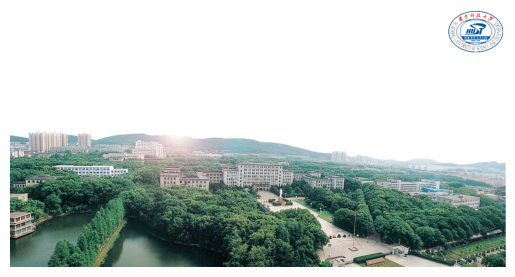

In [31]:
img1 = cv2.imread('./files/hust.jpg')
img2 = cv2.imread('./files/hustlogo.bmp')

# 1. 缩放logo
scale_percent = 20  # 我们将logo缩放到原图的20%
width = int(img2.shape[1] * scale_percent / 100)
height = int(img2.shape[0] * scale_percent / 100)
dim = (width, height)
img2_resized = cv2.resize(img2, dim, interpolation=cv2.INTER_AREA)

# 2. 定义ROI在右上角
rows, cols, channels = img2_resized.shape
roi = img1[0:rows, img1.shape[1] - cols:img1.shape[1]]

# 创建logo的mask和inverse mask
img2gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)
ret, mask_front = cv2.threshold(img2gray, 175, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask_front)

# 从ROI中黑化logo区域
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_front)
img2_fg = cv2.bitwise_and(img2_resized, img2_resized, mask=mask_inv)

# 将logo放在ROI并修改主图像
dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, img1.shape[1] - cols:img1.shape[1]] = dst

show_img(img1)
